In [1]:
import numpy as np
import scipy as sp
import matplotlib.pyplot as plt
%matplotlib inline

$$U(r)=-\dfrac{GMm}{r}+\alpha \dfrac{GMm}{r^2}$$

$$m\ddot{x}=-\dfrac{GMm}{({x^2+y^2})^{3/2}}x+2\alpha \dfrac{GMm}{({x^2+y^2})^2}x$$

$$m\ddot{y}=-\dfrac{GMm}{({x^2+y^2})^{3/2}}y+2\alpha \dfrac{GMm}{({x^2+y^2})^2}y$$

$$\frac{d}{dt}\left(
\begin{matrix}
    x   \\
    y \\
    \dot{x} \\
    \dot{y}
\end{matrix}\right)
=
\left[
\begin{matrix}
   \dot{x} \\
   \dot{y} \\
   -\dfrac{GMm}{({x^2+y^2})^{3/2}}x+2\alpha \dfrac{GMm}{({x^2+y^2})^2}x \\
   -\dfrac{GMm}{({x^2+y^2})^{3/2}}y+2\alpha \dfrac{GMm}{({x^2+y^2})^2}y
\end{matrix}\right]
=
f(x,y,\dot{x},\dot{y})
$$


In [2]:
class Planeta(object):
    """
    Esta clase inicializa un objecto con las instancias de la 
    condicion inicial y el alpha que esta en la correccion del
    potencial gravitacional.
    
     Ademas permite aplicar la ecuacion de movimiento y los 
     metodos de Verlet y RK4, para analizar como cambia en el
     tiempo.
    """

    def __init__(self, condicion_inicial, alpha=0):
        """
        __init__ es un método especial que se usa para inicializar las
        instancias de una clase.

        Ej. de uso:
        >> mercurio = Planeta([x0, y0, vx0, vy0])
        >> print(mercurio.alpha)
        >> 0.
        """
        self.estado_actual = condicion_inicial
        self.t_actual = 0.
        self.alpha = alpha

    def ecuacion_de_movimiento(self):
        """
        Implementa la ecuación de movimiento, como sistema de ecuaciónes de
        primer orden.
        """
        x, y, vx, vy = self.estado_actual
        a = self.alpha
        r = (x**2+y**2)**0.5
        fx = -x * r**(-3) + 2 * a * x * r**(-4)
        fy = -y * r**(-3) + 2 * a * y * r**(-4)
        ec_mov = np.array([vx, vy, fx, fy])
        return ec_mov
    
    def avanza_rk4(self, dt):
        """
        Toma la condición actual del planeta y avanza su posicion y velocidad
        en un intervalo de tiempo dt usando el método de RK4. El método no
        retorna nada, pero modifica los valores de self.estado_actual.
        """
        estado = self.estado_actual
        
        f_k1 = self.ecuacion_de_movimiento()
        k1 = dt*f_k1
        self.estado_actual = estado + k1/2.
        f_k2=self.ecuacion_de_movimiento()
        k2=dt*f_k2        
        self.estado_actual = estado + k2/2.
        f_k3=self.ecuacion_de_movimiento()
        k3=dt*f_k2        
        self.estado_actual = estado + k3
        f_k4=self.ecuacion_de_movimiento()
        k4=dt*f_k4        
        self.estado_actual = estado + (k4 + 2*(k3 + k2) + k1) / 6.
    
    def avanza_verlet(self, dt):
        """
        Similar a avanza_rk4, pero usando Verlet.
        """
        x, y, vx, vy = self.estado_actual
        fx = self.ecuacion_de_movimiento()[2]
        fy = self.ecuacion_de_movimiento()[3]        
        pos = np.array([x, y])
        vel = np.array([vx, vy])
        acel = np.array([fx,fy])
        pos_next = pos + vel * dt + .5 * acel * dt**2    
        self.estado_actual[0:2] = pos_next
        acel_next = self.ecuacion_de_movimiento()[2:4]
        vel_next = vel + .5 * (acel + acel_next) * dt
        y_next = sp.concatenate((pos_next, vel_next))
        self.estado_actual = y_next

    def energia_total(self):
        """
        Calcula la enérgía total del sistema en las condiciones actuales.
        """
        x, y, vx, vy = self.estado_actual
        r = (x**2 + y**2)**(1/2.)
        a=self.alpha
        E= (vx**2 + vy**2)/2. -1 / r + a/ r**2.
        return E

In [99]:
#from planeta import Planeta
# Crea el objeto planeta y las listas donde se 
# guardaran sus datos
v_yo= 0.1
condicion_inicial = [10.0, 0, 0, v_yo]
alpha = 10**(-2.937)

planeta = Planeta(condicion_inicial,alpha)
planeta.t_actual = 0.

DT=225000
dt = 0.01

x = np.zeros(DT)
y = np.zeros(DT)
t = np.zeros(DT)
vx = np.zeros(DT)
vy = np.zeros(DT)

x[0] , y[0] , vx[0] , vy[0] =condicion_inicial

energia = np.zeros(DT)

In [60]:
# implenta  RK-4
for i in range(1, DT):
    planeta.avanza_rk4(dt)
    energia[i] = planeta.energia_total()
    x[i], y[i], vx[i], vy[i] = planeta.estado_actual
    planeta.t_actual += dt
    t[i] = planeta.t_actual



In [66]:
# implenta  Verlet 
for i in range(1, DT):
    planeta.avanza_verlet(dt)
    energia[i] = planeta.energia_total()
    x[i], y[i], vx[i], vy[i] = planeta.estado_actual
    planeta.t_actual += dt
    t[i] = planeta.t_actual

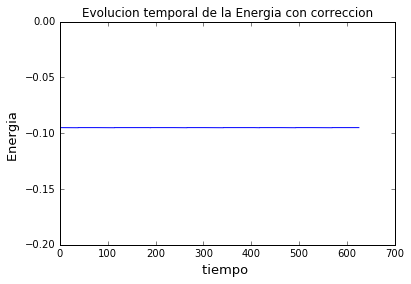

In [67]:
plt.plot(t,energia)
#plt.plot(t,x)
plt.xlabel('tiempo ',fontsize=13)
plt.ylabel('Energia ',fontsize=13)
plt.title('Evolucion temporal de la Energia con correccion',fontsize=12)
plt.ylim(-0.2,0.0)
plt.savefig('energia_verlet_5.pdf')

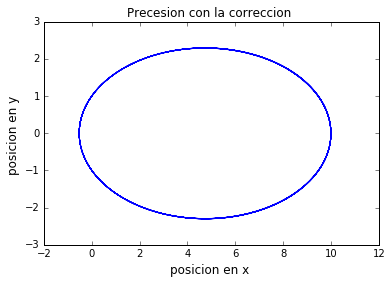

In [68]:
plt.plot(x,y)
plt.ylabel('posicion en y ',fontsize=12)
plt.xlabel('posicion en x ',fontsize=12)
plt.title('Precesion con la correccion ',fontsize=12)
plt.xlim(-2,12)
plt.savefig('pres_verlet_5.pdf')

In [112]:
#condiciones iniciales
x0 = 10
y0 = 0

r0 = (x0**2 + y0**2)**0.5
r = (x**2 + y**2)**(0.5)
eps = 1.2e-7
idx = sp.where(r0 - r < eps)

x_peri = [x[i] for i in idx[0]]
r_peri = [r[i] for i in idx[0]]
tiempo_peri = [t[i] for i in idx[0]]

N = len(x_peri)
omega = sp.zeros(N - 1)
for i in range(1, N):
    phi_i_anterior = sp.arccos(x_peri[i - 1] / r_peri[i - 1])
    phi_i = sp.arccos(x_peri[i] / r_peri[i])
    dt = sp.fabs(tiempo_peri[i] - tiempo_peri[i - 1])
    omega[i - 1] = sp.fabs(phi_i_anterior - phi_i) / dt

omega_promedio = sp.mean(omega)
omega_error = sp.std(omega)

/home/sergio/anaconda2/lib/python2.7/site-packages/numpy/core/_methods.py:59: RuntimeWarning: Mean of empty slice.
  warnings.warn("Mean of empty slice.", RuntimeWarning)
/home/sergio/anaconda2/lib/python2.7/site-packages/numpy/core/_methods.py:70: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)
/home/sergio/anaconda2/lib/python2.7/site-packages/numpy/core/_methods.py:82: RuntimeWarning: Degrees of freedom <= 0 for slice
  warnings.warn("Degrees of freedom <= 0 for slice", RuntimeWarning)
/home/sergio/anaconda2/lib/python2.7/site-packages/numpy/core/_methods.py:94: RuntimeWarning: invalid value encountered in true_divide
  arrmean, rcount, out=arrmean, casting='unsafe', subok=False)
/home/sergio/anaconda2/lib/python2.7/site-packages/numpy/core/_methods.py:116: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)


In [113]:
omega_promedio

nan

In [114]:
omega_error

nan

In [111]:
np.shape(idx)

(1, 224999)